# Chapter 1. Introduction

### General process
 - Data 획득 $\rightarrow$ Data 분석  $\rightarrow$ Knowledge(=Intelligence) 획득 $\rightarrow$ 의사결정(Decision) 활용 

## Data Science 목표
- 가치있는 Data를 발견하는 것?
- Data가 가치 있는지를 verify 하는 것?

## Computational tools
- 본 수업에서는 __Python__ 을 기반
 - VS. __R__ (https://data-flair.training/blogs/r-vs-python/)
- Install 
 - Anaconda [download](https://www.anaconda.com/download/)
 - datascience module
   - https://github.com/data-8/datascience (installation: $pip install datascience)
   - http://data8.org/datascience/ (document)

### Why Data Science?
- 결정(Decision)은 지식(Knowledge)와 지능(Intelligence)가 필요함
- Intelligence은 <span style="color:red">불확실성(Uncertainty)</span>과 반비례
- Data science 방법론을 통해 uncertainty를 낮출 수 있다.
- 특히, 최근 아래의 기술을 통해 매우 효율적인 data science 분석이 가능해지고 있다.
 - __Big Data__ (The explosion of data)
 - Powerful __Computations__ : Resources (Clouding, Supercomputers, IoT, ...) + Tools (AI, Machine learning, ...)

### Example : Handling Financial Data!
- [Quandl](https://www.quandl.com/): 다양한 금융데이터 제공 website
 - 가입하지 않을 경우 하루 50개 request 제한
 - 가입할 경우 제한없이 request

In [1]:
!pip install quandl

  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection


In [0]:
import quandl # Need to install 'quandl' ($pip install quandl)
import datetime as dt
import matplotlib.pyplot as plt
today = dt.date.today()
data = quandl.get('WIKI/AAPL',start_date='2017-01-01', end_date=str(today))
data.head();

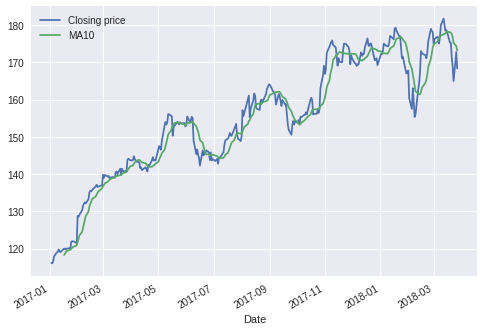

In [3]:
data['Close'].plot(label='Closing price');
data['MA10'] = data['Close'].rolling(10).mean();
data['MA10'].plot(label='MA10');
plt.legend();

### Another Example : Reading Books Fast!
- [Project Gutenberg](http://www.gutenberg.org/): online public-domain 책 출판 website
- 다음 미리 준비된 책을 고려
 - _Adventures of Huckleberry Finn_ by Mark Twain [here](https://www.inferentialthinking.com/data/huck_finn.txt) 
 - _Little Women_ by Louisa May Alcott [here](https://www.inferentialthinking.com/data/little_women.txt)
- 코드를 아직 이해하지 않아도 됨.
- 데이터 처리에 프로그래밍이 매우 쉽게 연결될 수 있음에 주목.


In [4]:
# First Code We Touch 
from datascience import *
from urllib.request import urlopen 
import re  # regular expression module
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

Table().with_column('Chapters', huck_finn_chapters)


Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I had shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


_Little Women_ 도 같은 방식으로 시도해 보자.

In [5]:
little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
little_women_text = read_url(little_women_url)
little_women_chapters = little_women_text.split('CHAPTER ')[1:]
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


### In-depth 
- _Adventures of Huckleberry Finn_ 에서 세 주인공(Jim, Tom, Huck)이 얼마나 자주 등장하는지 알아보자. 

In [6]:
from datascience import *
import numpy as np
counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])
print(counts)

Jim  | Tom  | Huck
0    | 6    | 3
16   | 24   | 2
0    | 5    | 2
8    | 0    | 1
0    | 0    | 0
0    | 0    | 2
0    | 2    | 0
22   | 2    | 5
11   | 0    | 1
19   | 0    | 0
... (33 rows omitted)


Jim  | Tom  | Huck | Chapter
0    | 6    | 3    | 1
16   | 30   | 5    | 2
16   | 35   | 7    | 3
24   | 35   | 8    | 4
24   | 35   | 8    | 5
24   | 35   | 10   | 6
24   | 37   | 10   | 7
46   | 39   | 15   | 8
57   | 39   | 16   | 9
76   | 39   | 16   | 10
... (33 rows omitted)


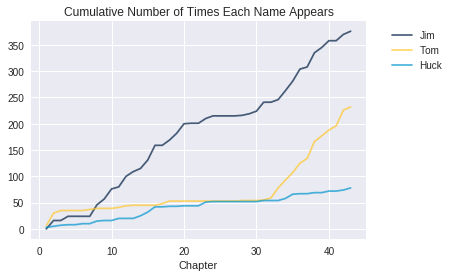

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
print(cum_counts)
cum_counts.plot(column_for_xticks=3)
plt.title('Cumulative Number of Times Each Name Appears');

_Little Women_ 도 같은 방식으로 시도해 보자.
- 다섯 주인공(Amy, Beth, Jo, Meg, Laurie)이 얼마나 자주 등장하는지 알아보자. 

In [0]:
counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
    ])

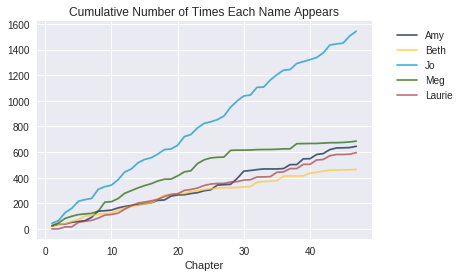

In [9]:
# Plot the cumulative counts.
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plt.title('Cumulative Number of Times Each Name Appears');

### Another in-depth
- chapter의 길이와 문장수 사이의 관계를 살펴보자.

In [10]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.
chars_periods_huck_finn = Table().with_columns([
        'Huck Finn Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_huck_finn

Huck Finn Chapter Length,Number of Periods
7026,66
11982,117
8529,72
6799,84
8166,91
14550,125
13218,127
22208,249
8081,71
7036,70


In [11]:
chars_periods_little_women = Table().with_columns([
        'Little Women Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])
chars_periods_little_women

Little Women Chapter Length,Number of Periods
21759,189
22148,188
20558,231
25526,195
23395,255
14622,140
14431,131
22476,214
33767,337
18508,185


관계가 잘 드러나 보이는가?

잘 보이지 않는다면 어떻게 할까?

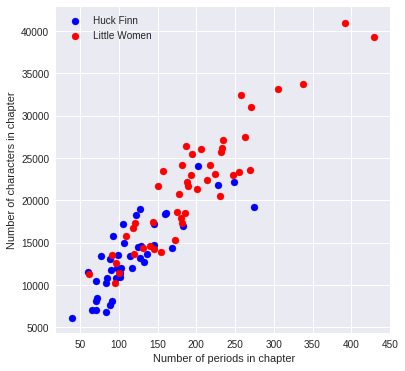

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(chars_periods_huck_finn.column(1), 
              chars_periods_huck_finn.column(0), 
              color='blue', label='Huck Finn')
plt.scatter(chars_periods_little_women.column(1), 
              chars_periods_little_women.column(0), 
              color='red', label='Little Women')
plt.legend()
plt.xlabel('Number of periods in chapter')
plt.ylabel('Number of characters in chapter');


### Recap
- Data science의 일반적 과정
 - Data 획득 $\rightarrow$ Data 분석  $\rightarrow$ Knowledge(=Intelligence) 획득 $\rightarrow$ 의사결정(Decision) 활용
- Python, R 등 활용 : 매우 편리한 구현이 가능
- 적절한 시각화의 활용 : 분석 결과의 압축
- 앞으로 data science 각 과정을 보다 심도있게 공부